## The dataset is available at https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

In [1]:
setwd('F:/Aircraft accident analysis/Aircrash')

In [2]:
aircrash <- read.csv('3-Airplane_Crashes_Since_1908.txt',stringsAsFactors = FALSE)

In [3]:
str(aircrash)

'data.frame':	5268 obs. of  13 variables:
 $ Date        : chr  "09/17/1908" "07/12/1912" "08/06/1913" "09/09/1913" ...
 $ Time        : chr  "17:18" "06:30" "" "18:30" ...
 $ Location    : chr  "Fort Myer, Virginia" "AtlantiCity, New Jersey" "Victoria, British Columbia, Canada" "Over the North Sea" ...
 $ Operator    : chr  "Military - U.S. Army" "Military - U.S. Navy" "Private" "Military - German Navy" ...
 $ Flight..    : chr  "" "" "-" "" ...
 $ Route       : chr  "Demonstration" "Test flight" "" "" ...
 $ Type        : chr  "Wright Flyer III" "Dirigible" "Curtiss seaplane" "Zeppelin L-1 (airship)" ...
 $ Registration: chr  "" "" "" "" ...
 $ cn.In       : chr  "1" "" "" "" ...
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Ground      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Summary     : chr  "During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximat"| __tr

In [4]:
library(dplyr)
library(tidyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
aircrash2 <- separate(aircrash, Date, c("Month", "Day", "Year"), sep = "/")

In [6]:
str(aircrash2)

'data.frame':	5268 obs. of  15 variables:
 $ Month       : chr  "09" "07" "08" "09" ...
 $ Day         : chr  "17" "12" "06" "09" ...
 $ Year        : chr  "1908" "1912" "1913" "1913" ...
 $ Time        : chr  "17:18" "06:30" "" "18:30" ...
 $ Location    : chr  "Fort Myer, Virginia" "AtlantiCity, New Jersey" "Victoria, British Columbia, Canada" "Over the North Sea" ...
 $ Operator    : chr  "Military - U.S. Army" "Military - U.S. Navy" "Private" "Military - German Navy" ...
 $ Flight..    : chr  "" "" "-" "" ...
 $ Route       : chr  "Demonstration" "Test flight" "" "" ...
 $ Type        : chr  "Wright Flyer III" "Dirigible" "Curtiss seaplane" "Zeppelin L-1 (airship)" ...
 $ Registration: chr  "" "" "" "" ...
 $ cn.In       : chr  "1" "" "" "" ...
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Ground      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Summary     : chr  "During a demonstration flight, a U.S. Army flyer flown by Orville 

In [7]:
crashesByYear <- as.data.frame(table(aircrash2$Year))

In [8]:
colnames(crashesByYear) <- c('Year', 'NoOfCrashes')

In [9]:
write.csv(crashesByYear, "crashesByYear.csv", row.names=FALSE)

In [10]:
peopleOnBoard <- as.data.frame(aircrash2 %>% group_by(Year) %>% summarise(peopleOnBoard = sum(Aboard)))
FatalitiesByYear <- as.data.frame(aircrash2 %>% group_by(Year) %>% summarise(FatalitiesByYear = sum(Fatalities)))
survived <- peopleOnBoard$peopleOnBoard - FatalitiesByYear$FatalitiesByYear
survivedByYear <- as.data.frame(cbind(FatalitiesByYear$Year, survived))
colnames(survivedByYear) <- c('Year', 'Survived')
write.csv(peopleOnBoard, "peopleOnBoard.csv", row.names=FALSE)
write.csv(FatalitiesByYear, 'FatalitiesByYear.csv', row.names=FALSE)
write.csv(survivedByYear, 'survivedByYear.csv', row.names=FALSE)


In [11]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.3.2"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


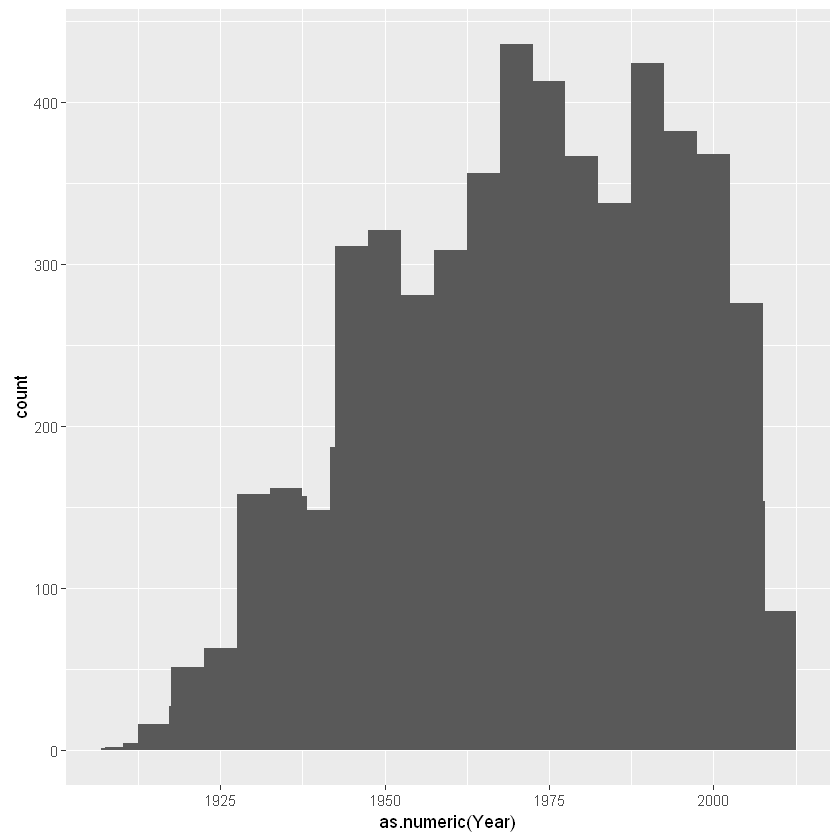

In [12]:
qplot(as.numeric(Year), data = aircrash2) +geom_histogram(stat = "bin", binwidth=5)

Warning message:
"Removed 16 rows containing missing values (geom_point)."

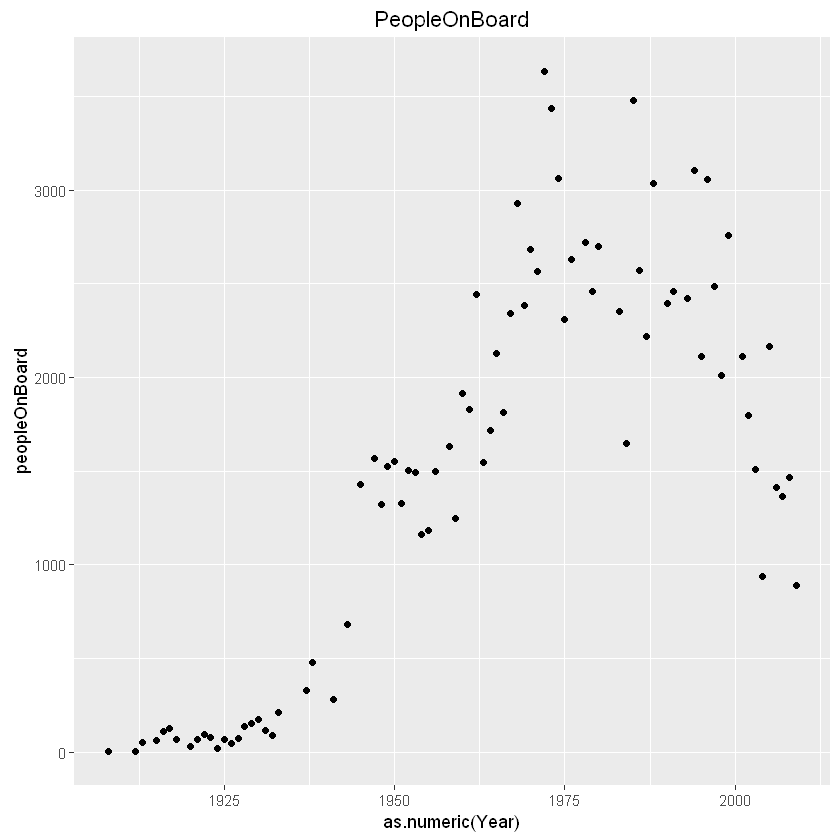

In [13]:
qplot(x = as.numeric(Year),y = peopleOnBoard, data = peopleOnBoard) + labs(title = 'PeopleOnBoard')

Warning message:
"Removed 9 rows containing missing values (geom_point)."

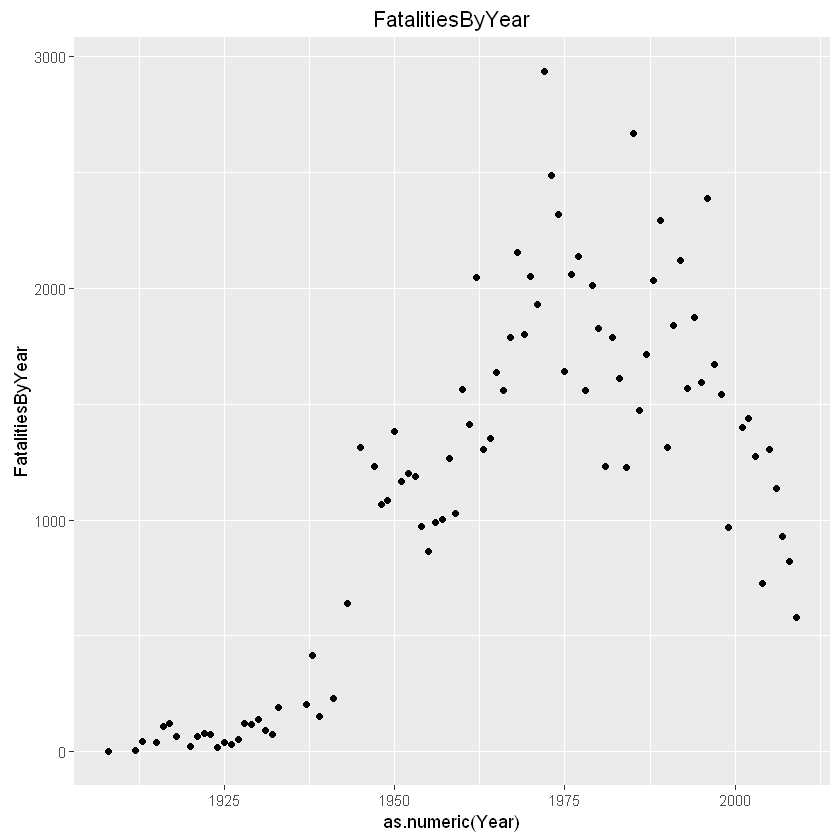

In [14]:
qplot(x = as.numeric(Year),y = FatalitiesByYear, data = FatalitiesByYear) + labs(title = 'FatalitiesByYear')

Warning message:
"Removed 16 rows containing missing values (geom_point)."

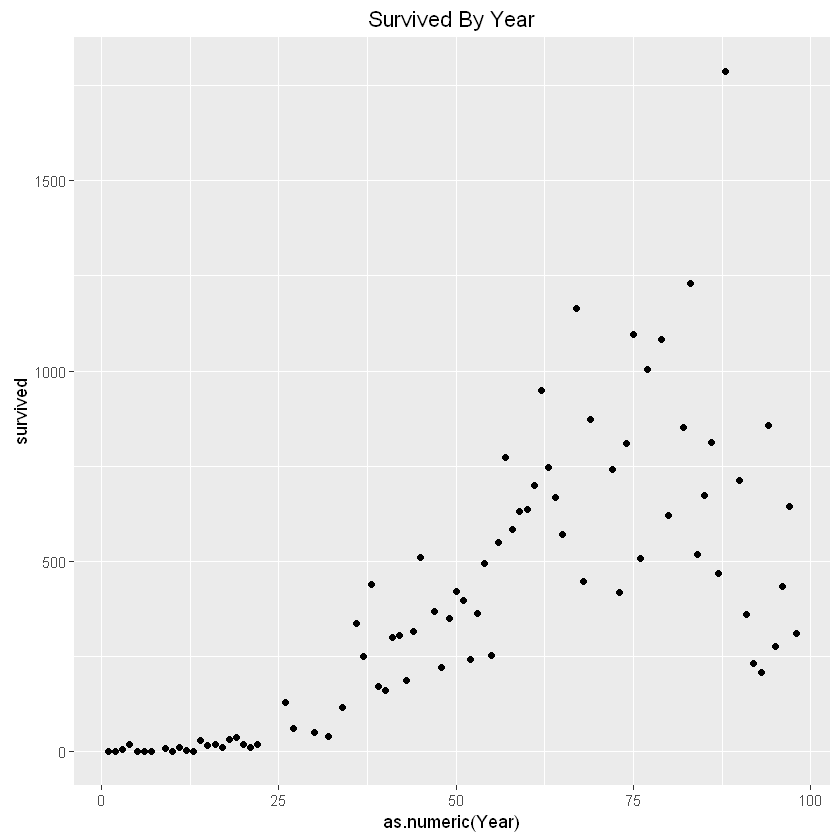

In [15]:
qplot(x = as.numeric(Year),y = survived, data = survivedByYear) + labs(title = 'Survived By Year')

#### It seems there is an increase trend in air crashes till 1975. Similarly for others like people onboard and fatalities by year can be plotted. But it seems, it does not show any trend through which we can make further analysis except that they increase till 1975 and then decrease. But it could be construed that since people onboard is increasing initially and then decreasing. But there is a clear indication in survival trend.  Till 1925, there has been almost zero survival. But there after there is an increase in number of survival though there is a decrease trend towards the end. We may have to analyze survival rate per year analysis to find out more information.
Let us run this R code.


In [16]:
failureRate = FatalitiesByYear$FatalitiesByYear/peopleOnBoard$peopleOnBoard
str(failureRate)

 num [1:98] 0.5 1 0.882 0.667 0.991 ...


Warning message:
"Removed 16 rows containing missing values (geom_point)."

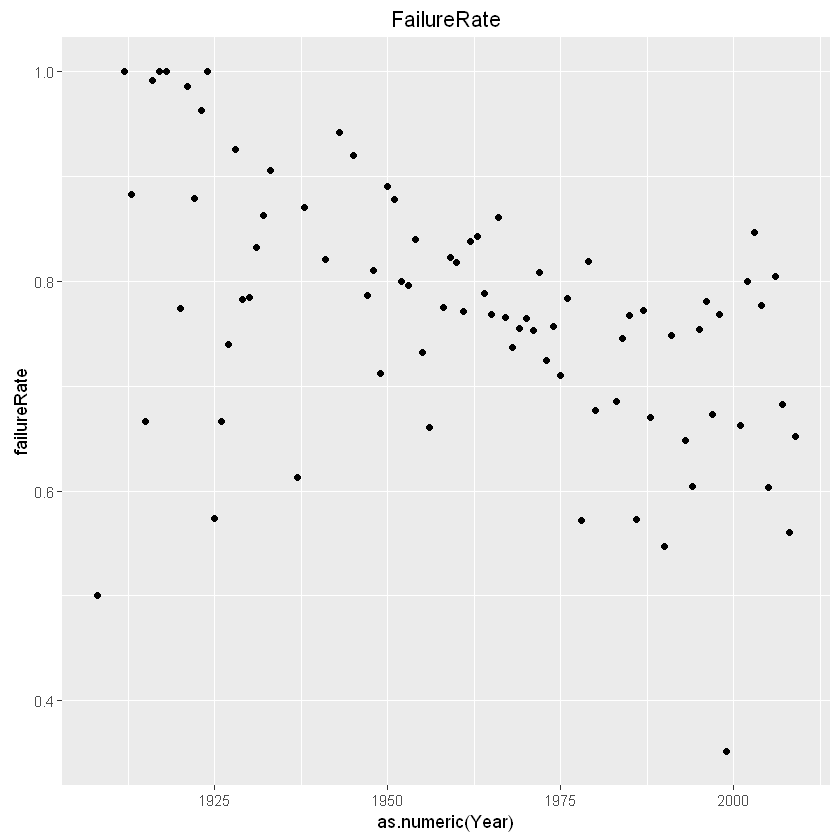

In [17]:
FatalitiesByYear$failureRate = failureRate
qplot(x = as.numeric(Year),y = failureRate, data = FatalitiesByYear) + labs(title = 'FailureRate')

#### Though the failure rate shows a decreasing trend, it does not give more information beyond except this. We may have to look at the Fatalities as proportion of people on Board to explore more as well. Let us run this code.

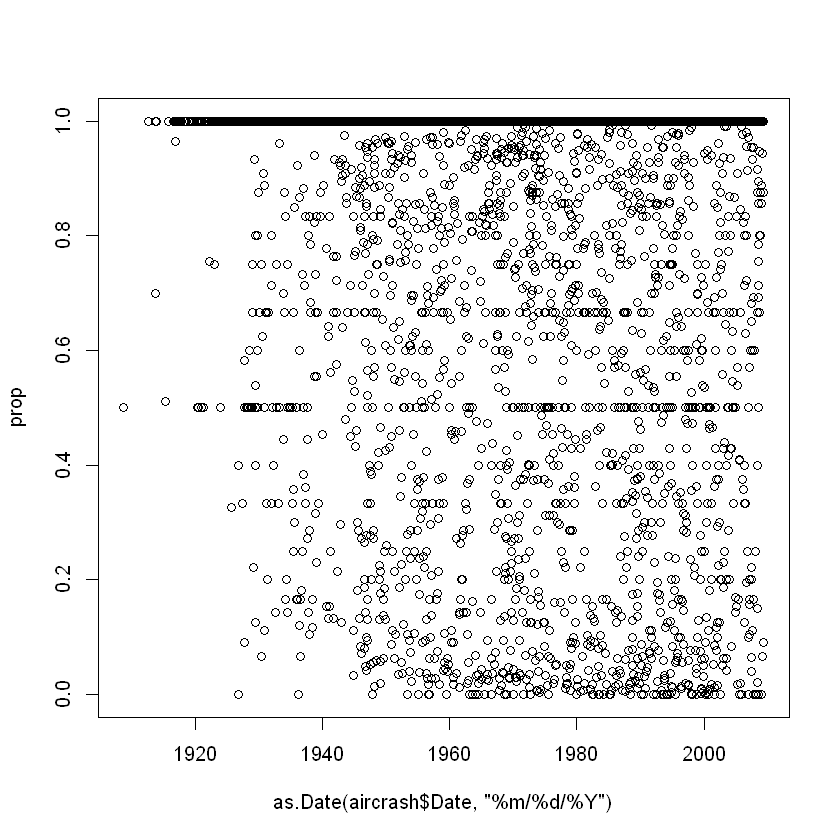

In [18]:
prop <- aircrash2$Fatalities/aircrash2$Aboard
plot(as.Date(aircrash$Date,"%m/%d/%Y") , prop)

#### The plot is saved as ‘Fatalities as a propotion of peopleonBoard’.  Though it does not show any trend, it can be concluded that most of the times Fatalities is equal to people on board. This can again be verified from this.

In [19]:
checkFatality = aircrash2$Aboard == aircrash2$Fatalities
table(checkFatality)

checkFatality
FALSE  TRUE 
 1732  3514 

#### It can be shown that there is an almost 65-70% probability that all the people on board will die, if there is an accident.

In [20]:
crashesByOperator <- as.data.frame(table(aircrash2$Operator) )
str(crashesByOperator)

'data.frame':	2477 obs. of  2 variables:
 $ Var1: Factor w/ 2477 levels "","A B Aerotransport",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq: int  18 2 1 1 3 3 1 1 1 1 ...


In [21]:
crashesByTypeofAircraft <- as.data.frame(table(aircrash2$Type))
str(crashesByTypeofAircraft)

'data.frame':	2447 obs. of  2 variables:
 $ Var1: Factor w/ 2447 levels "","AÃ©rospatiale SE-210 Caravelle",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq: int  27 1 1 1 1 1 1 1 1 1 ...


#### From the data it is observed that there could be duplicates since the same names are spelled differently(there are spaces in between parts of the names) at different places for operator. We may have to bring it to one form to summarize on them. Let us define a function to remove spaces in names and apply it on all the rows of Operator . Let us make a copy of aircrash2.

In [22]:
aircrash2copy <- aircrash2
xyz <- function (x) { gsub(' ', '', x)}
for (i in 1:nrow(aircrash2)) {
    aircrash2copy$Operator[i] = xyz(aircrash2copy$Operator[i])
}


#### Let us run the previous codes again for aircrash2copy.

In [23]:
crashesByOperator <- as.data.frame(table(aircrash2copy$Operator))
str(crashesByOperator)

'data.frame':	2464 obs. of  2 variables:
 $ Var1: Factor w/ 2464 levels "","AÃ©reoRutaMaya",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Freq: int  18 1 1 3 1 5 1 1 1 3 ...


#### Now we can find maximum no of accidents by operator and type by running the following commands.

In [24]:
crashesByOperator$Var1[which(crashesByOperator$Freq == max(crashesByOperator$Freq))]

[1] Aeroflot
2464 Levels:  AÃ©reoRutaMaya AÃ©rotaxiCachanilla ... ZenNippon

In [25]:
crashesByTypeofAircraft$Var1[which(crashesByTypeofAircraft$Freq == max(crashesByTypeofAircraft$Freq))]

[1] Douglas DC-3
2447 Levels:  ... Zeppelin LZ-129

#### Hence Aeroflot operator has the maximum number of aircrashes and Douglas DC-3 is type of Aircraft which has maximum number of crashes.

#### We will have to do text mining for this. But before we proceed for this we will make some modification to data so that we can keep track of the process.

In [26]:
number <- seq(1,nrow(aircrash2) )
str(number)


 int [1:5268] 1 2 3 4 5 6 7 8 9 10 ...


In [27]:
aircrash2$ID <- number
str(aircrash2)

'data.frame':	5268 obs. of  16 variables:
 $ Month       : chr  "09" "07" "08" "09" ...
 $ Day         : chr  "17" "12" "06" "09" ...
 $ Year        : chr  "1908" "1912" "1913" "1913" ...
 $ Time        : chr  "17:18" "06:30" "" "18:30" ...
 $ Location    : chr  "Fort Myer, Virginia" "AtlantiCity, New Jersey" "Victoria, British Columbia, Canada" "Over the North Sea" ...
 $ Operator    : chr  "Military - U.S. Army" "Military - U.S. Navy" "Private" "Military - German Navy" ...
 $ Flight..    : chr  "" "" "-" "" ...
 $ Route       : chr  "Demonstration" "Test flight" "" "" ...
 $ Type        : chr  "Wright Flyer III" "Dirigible" "Curtiss seaplane" "Zeppelin L-1 (airship)" ...
 $ Registration: chr  "" "" "" "" ...
 $ cn.In       : chr  "1" "" "" "" ...
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Ground      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Summary     : chr  "During a demonstration flight, a U.S. Army flyer flown by Orville 

In [28]:
aircrash3 <- filter(aircrash2, Summary != '')
str(aircrash3)

'data.frame':	4878 obs. of  16 variables:
 $ Month       : chr  "09" "07" "08" "09" ...
 $ Day         : chr  "17" "12" "06" "09" ...
 $ Year        : chr  "1908" "1912" "1913" "1913" ...
 $ Time        : chr  "17:18" "06:30" "" "18:30" ...
 $ Location    : chr  "Fort Myer, Virginia" "AtlantiCity, New Jersey" "Victoria, British Columbia, Canada" "Over the North Sea" ...
 $ Operator    : chr  "Military - U.S. Army" "Military - U.S. Navy" "Private" "Military - German Navy" ...
 $ Flight..    : chr  "" "" "-" "" ...
 $ Route       : chr  "Demonstration" "Test flight" "" "" ...
 $ Type        : chr  "Wright Flyer III" "Dirigible" "Curtiss seaplane" "Zeppelin L-1 (airship)" ...
 $ Registration: chr  "" "" "" "" ...
 $ cn.In       : chr  "1" "" "" "" ...
 $ Aboard      : int  2 5 1 20 30 41 19 20 22 19 ...
 $ Fatalities  : int  1 5 1 14 30 21 19 20 22 19 ...
 $ Ground      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Summary     : chr  "During a demonstration flight, a U.S. Army flyer flown by Orville 

#### I have created a new dataset aircrash3 for which there is no row without summary. I will start doing text mining on this. Let us create a unknowcluster for which there is no summary like this.

In [29]:
unknowncluster <- filter(aircrash2, Summary == '')

#### Let us run the following commands in R.

In [31]:
 install.packages('tm', repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/me/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'NLP', 'slam'



package 'NLP' successfully unpacked and MD5 sums checked


Warning message:
"unable to move temporary installation 'C:\Users\me\Documents\R\win-library\3.3\file2e6421543f6b\NLP' to 'C:\Users\me\Documents\R\win-library\3.3\NLP'"

package 'slam' successfully unpacked and MD5 sums checked
package 'tm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\me\AppData\Local\Temp\RtmpQ3KFNj\downloaded_packages


In [32]:
install.packages('SnowballC', repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/me/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'SnowballC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\me\AppData\Local\Temp\RtmpQ3KFNj\downloaded_packages


In [34]:
install.packages('NLP', repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/me/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'NLP' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\me\AppData\Local\Temp\RtmpQ3KFNj\downloaded_packages


In [35]:
library(tm)
library(SnowballC)


Warning message:
"package 'tm' was built under R version 3.3.2"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.3.2"
Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Warning message:
"package 'SnowballC' was built under R version 3.3.2"

In [36]:
corpus = Corpus(VectorSource(aircrash3$Summary))

In [37]:
corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 4878

In [38]:
corpus = tm_map(corpus, content_transformer(tolower))
corpus = tm_map(corpus, removePunctuation)
corpus = tm_map(corpus, removeNumbers)
newstopwords = c(stopwords('english'), 'aircrash','plane','aircraft','crash','flight')
corpus = tm_map(corpus, removeWords, newstopwords)
corpus = tm_map(corpus, stripWhitespace)
corpus = tm_map(corpus, stemDocument, language = 'english')
corpus = tm_map(corpus, removeWords, 'crash')
dtm = DocumentTermMatrix(corpus)
freqterms <- findFreqTerms(dtm, lowfreq = 200)

In [39]:
freqterms

[1] "accid"      "air"        "airport"    "altitud"    "approach"  
 [6] "area"       "attempt"    "captain"    "cargo"      "caus"      
[11] "condit"     "continu"    "control"    "crew"       "descend"   
[16] "descent"    "due"        "emerg"      "engin"      "error"     
[21] "fail"       "failur"     "feet"       "fire"       "fli"       
[26] "fog"        "follow"     "fuel"       "ground"     "heavi"     
[31] "helicopt"   "high"       "hit"        "improp"     "instrument"
[36] "kill"       "land"       "left"       "loss"       "lost"      
[41] "low"        "maintain"   "make"       "mile"       "minut"     
[46] "mountain"   "one"        "passeng"    "pilot"      "poor"      
[51] "power"      "procedur"   "rain"       "result"     "right"     
[56] "rout"       "runway"     "sea"        "sever"      "short"     
[61] "stall"      "struck"     "take"       "takeoff"    "terrain"   
[66] "tree"       "turn"       "two"        "vfr"        "weather"   
[71] "wing"

### Some of the words which may give us some clue for further analysis may be ‘fire’, ‘fog’,’fuel’,’instrument’, ‘rain’, ‘weather’. Since rain , fog, snow or weather could be related to bad weather condition, unambiguously we can select rows having these words in their summary as a single cluster.  From the data, it seems there could be very few exceptions in this case. Hence, I am running this R code to take out the rows having weather related word to keep it as a part of weather cluster.

#### The R code is here.

In [42]:
weathercluster <- filter(aircrash3, grepl('fog|rain|weather|snow', Summary))

#We will do the text mining on the rest of the data again like mentioned below.

aircrash3rest <- filter(aircrash3, !grepl('fog|rain|weather|snow', Summary))
 corpus = Corpus(VectorSource(aircrash3rest$Summary))
 corpus = tm_map(corpus, content_transformer(tolower))
 corpus = tm_map(corpus, removePunctuation)
 corpus = tm_map(corpus, removeNumbers)
 newstopwords = c(stopwords('english'), 'aircrash','plane','aircraft','crash','flight')
 corpus = tm_map(corpus, removeWords, newstopwords)
 corpus = tm_map(corpus, stripWhitespace)
 corpus = tm_map(corpus, stemDocument, language = 'english')
 corpus = tm_map(corpus, removeWords, 'crash')
 termfreq <- colSums(as.matrix(dtm))
 

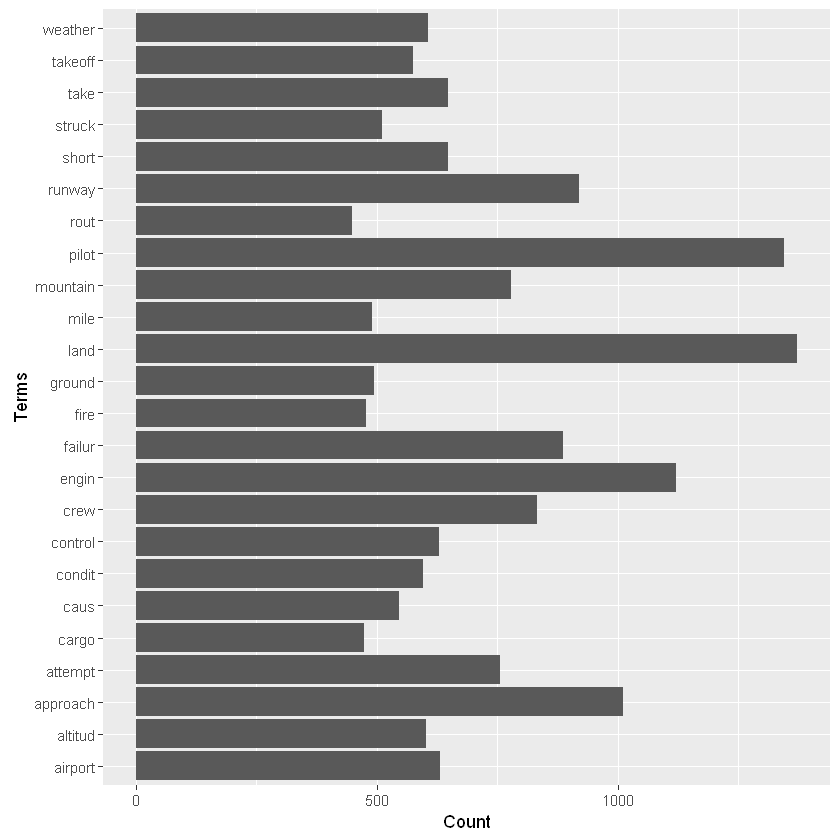

In [45]:
termfreq <- subset(termfreq, termfreq >= 200)
 df <- data.frame(term = names(termfreq), freq = termfreq)
 ggplot(df, aes(x = term, y = freq)) + geom_bar(stat = "identity") + xlab("Terms") + ylab("Count") + coord_flip()


In [47]:
install.packages('wordcloud', repos='http://cran.us.r-project.org')
library('wordcloud')

Installing package into 'C:/Users/me/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'wordcloud' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\me\AppData\Local\Temp\RtmpQ3KFNj\downloaded_packages


Warning message:
"package 'wordcloud' was built under R version 3.3.2"Loading required package: RColorBrewer
Warning message:
"package 'RColorBrewer' was built under R version 3.3.2"

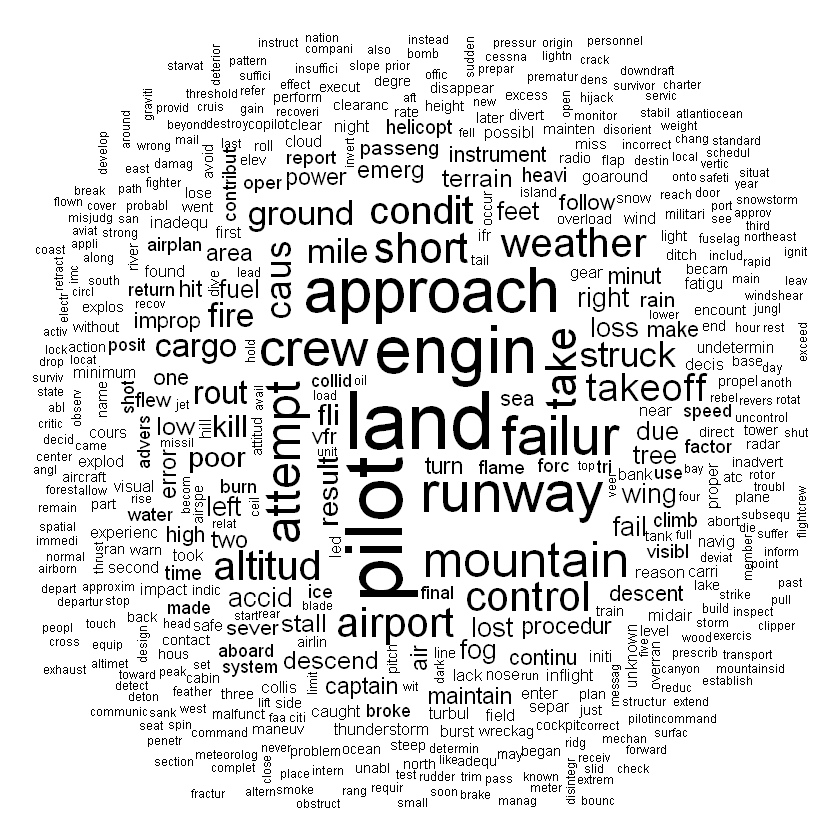

In [48]:
m = as.matrix(dtm)
word.freq <- sort(colSums(m))
 wordcloud(words = names(word.freq), freq = word.freq, min.freq = 30,random.order = F)



### From the wordcloud also it seems pilot, engine, runway , approach, takeoff, control, cargo, mountain, fire, fuel,  could be having some relationship with the crashes since they are frequently used. 

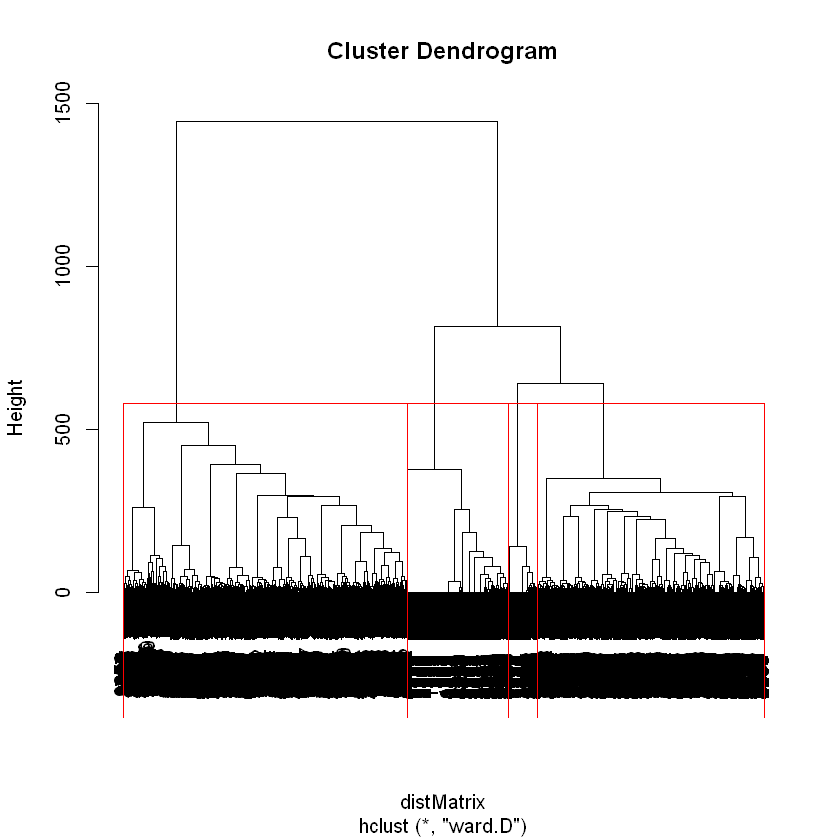

In [49]:
sparse = removeSparseTerms(dtm, 0.95)
 m2 <- as.matrix(sparse)
 distMatrix <- dist(scale(m2))
 fit <- hclust(distMatrix, method = "ward.D")
 plot(fit)
 rect.hclust(fit, k = 4)


### The dendogram does not give a clear picture now. Let us move ahead with Kmeans clustering.

In [74]:
set.seed(12345)
k <- 4
KMC <- kmeans(m2, k)
 for (i in 1:k) {
 cat(paste("cluster ", i, ": ", sep = ""))
 s <- sort(KMC$centers[i, ])
 cat(names(s)[1:5], "\n")
 }


cluster 1: fire wing emerg hit right 
cluster 2: pilot error accid terrain descend 
cluster 3: rout lost fli terrain low 
cluster 4: fog hit mountain error kill 


### Nothing can be understood from these words. Hence we will have to analyze few texts to create or understand the context for cluster.  Now let us create 4 clusters based on the above mentioned clustering approach.

In [75]:
cluster1 = aircrash3rest[which(KMC$cluster == 1),]
cluster2 = aircrash3rest[which(KMC$cluster == 2),]
cluster3 = aircrash3rest[which(KMC$cluster == 3),]
cluster4 = aircrash3rest[which(KMC$cluster == 4),]



In [68]:
nrow(cluster1)

[1] 829

In [69]:
head(cluster1$Summary)

[1] "Caught fire in midair. The pilot leaped from the plane to his death as the plane began to go into a dive."      
[2] "Engine failure."                                                                                                
[3] "The plane crashed into the Waalhaven harbor."                                                                   
[4] "Engine failure."                                                                                                
[5] "Crashed onto a roof and garage on takeoff and burst into flames. The motor may have not been warmed- up enough."
[6] "The aircraft crashed into lake Constance while attempting to landing."

In [70]:
nrow(cluster2)

[1] 224

In [71]:
head(cluster2$Summary)

[1] "Went into a tailspin and crashed into a corn field"                
[2] "The mail plane crashed into Mt. Lamentation and burst into flames."
[3] "Crashed on take off due to engine failure."                        
[4] "Crashed during takeoff."                                           
[5] "The cargo plane struck a mountain while attempting a go-around."   
[6] "The cargo plane flew into a mountain"

In [72]:
nrow(cluster3)

[1] 3303

In [73]:
head(cluster3$Summary)

[1] "During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later."
[2] "First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight."                                                                                                                                                                                                                                                                                                                                                                                                                        
[3] "The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed."                                                                                                                                                                                                                                                                                                                                                                                             
[4] "The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants."                                                                                                                                                                                                                                                                                                       
[5] "Hydrogen gas which was being vented was sucked into the forward engine and ignited causing the airship to explode and burn at 3,000 ft.."                                                                                                                                                                                                                                                                                                                                                                                   
[6] "Crashed into trees while attempting to land after being shot down by British and French aircraft."

In [63]:
nrow(cluster4)

[1] 224

In [64]:
head(cluster4$Summary)

[1] "Went into a tailspin and crashed into a corn field"                
[2] "The mail plane crashed into Mt. Lamentation and burst into flames."
[3] "Crashed on take off due to engine failure."                        
[4] "Crashed during takeoff."                                           
[5] "The cargo plane struck a mountain while attempting a go-around."   
[6] "The cargo plane flew into a mountain"

### We can do further analysis. We can go for more than one word combination(bigram , trigram etc) to get better results.  

### We can name the clusters and look at the distributions.